<a href="https://colab.research.google.com/github/yoondaeng/ICE4104-AI-Applications/blob/Lab3/Lab3_KNN_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.K-NN training

## 1.1. Preparing data with Numpy

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

이전 강의에서는 zip() 함수를 이용해 파이썬 리스트를 순회하면서 원소를 하나씩 꺼내 생선 하나의 길이와 무게를 리스트 안의 리스트로 직접 구성했습니다.

In [3]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


이번에는 넘파이를 사용해 간편하게 만들어 보겠습니다.

넘파이의 **column_stack()** 함수는 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결합니다.

In [4]:
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [5]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [6]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [7]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [8]:
fish_target = np.concatenate((np.ones(35), np.zeros(14))) # 앞에 35개 도미 / 뒤 14개 정어리
# concatenate() method

In [9]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 1.2. Split the training set and test set with scikit-learn

이전 강의에서는 넘파이 배열의 인덱스를 직접 섞어서 훈련 세트와 테스트 세트로 나누었습니다.

In [10]:
# Converting a Python List to a Numpy Array
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

# Data shuffling
# The random.seed() function sets the seed needed to generate random numbers
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

# Create train set
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

# Create test set
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [11]:
print(index[:35])
print(input_arr[13])

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2]
[ 32. 340.]


In [12]:
test_arr = np.arange(10) ** 2
print(test_arr)
print(test_arr[[0, 5, 6]])

[ 0  1  4  9 16 25 36 49 64 81]
[ 0 25 36]


이 방법은 조금 번거롭기 때문에, 이번에는 좀 더 간편한 방법을 사용해 보겠습니다.

Scikit-learn의 **train_test_split()** 함수는 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나누어 줍니다. 또한, 나누기 전에 알아서 섞어 주기도 합니다.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

In [15]:
len(fish_data)

49

In [16]:
len(train_target), len(test_target)

(36, 13)

fish_data와 fish_target 2개의 배열을 전달했으므로 2개씩 나뉘어 총 4개의 배열이 반환됩니다.

차례대로 처음 2개는 입력 데이터(train_input, test_input), 나머지 2개는 타깃 데이터(train_target, test_target) 입니다.

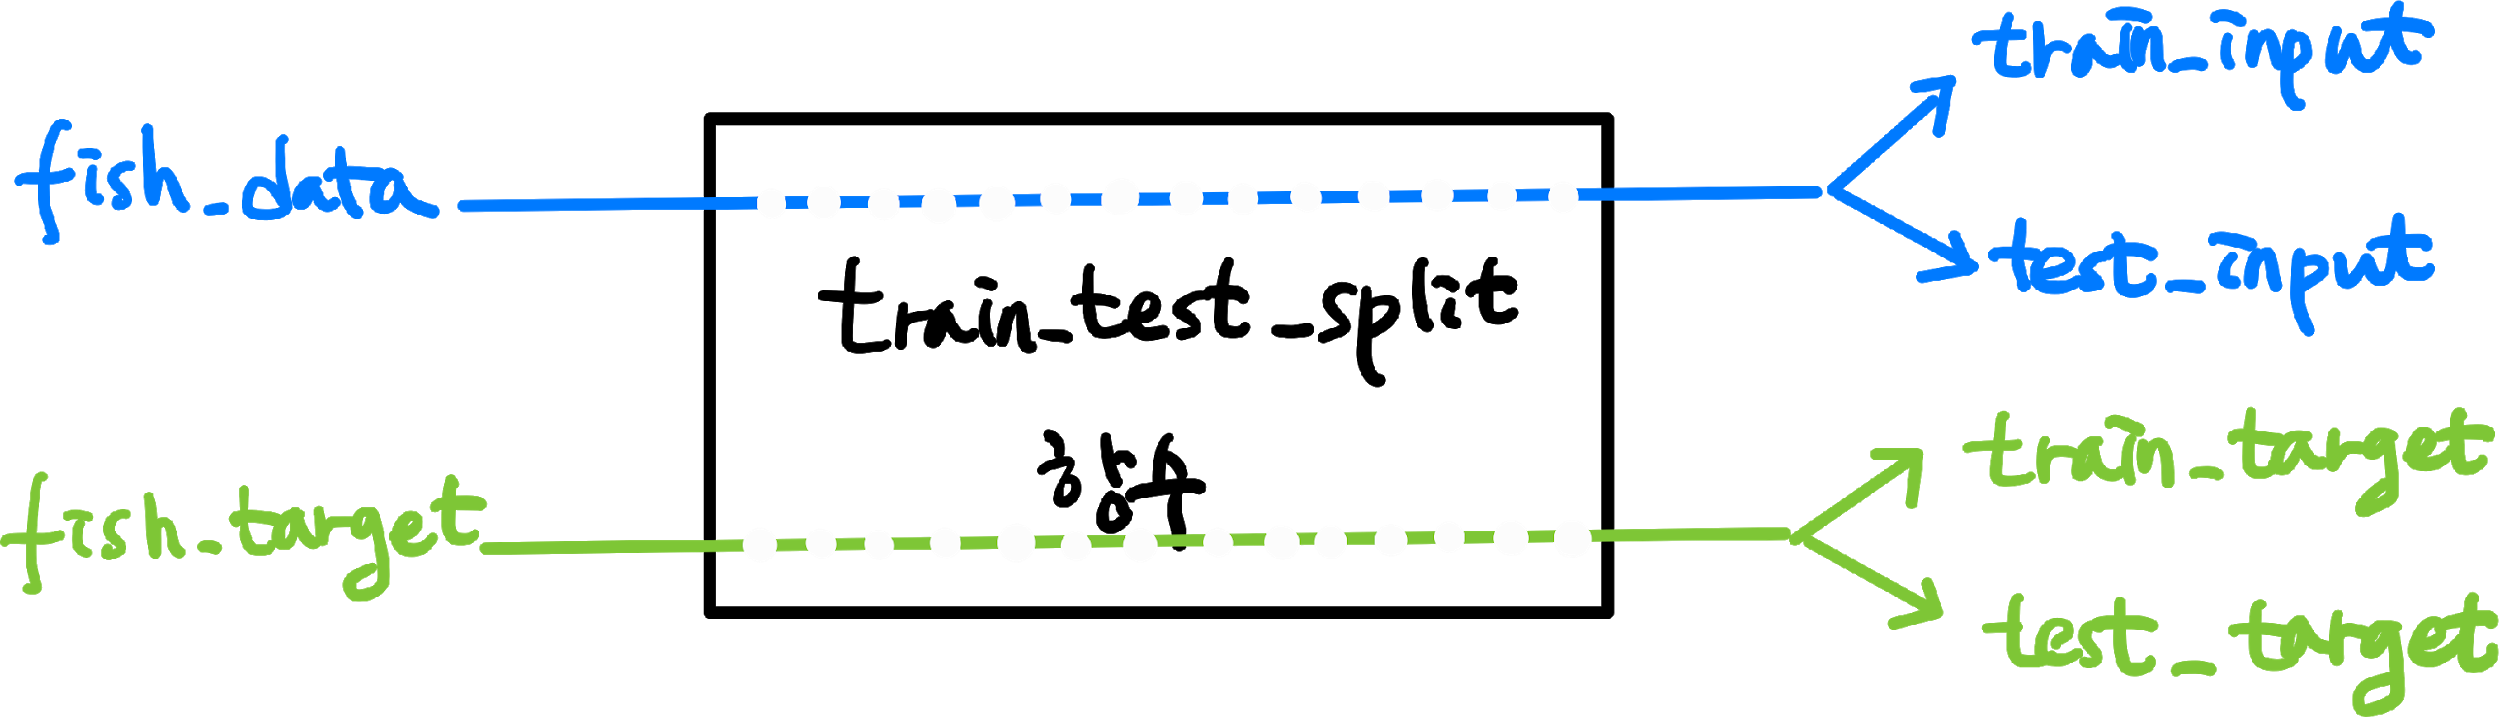

In [17]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [18]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [19]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [20]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


13개의 테스트 세트 중에 10개가 도미(1)이고, 3개가 빙어(0)입니다.

잘 섞인 것 같지만 빙어의 비율이 조금 모자랍니다. 원래 도미와 빙어의 개수가 35개와 14개이므로 두 생선의 비율은 2.5:1 입니다.

하지만 이 테스트 세트의 도미와 빙어의 비율은 3.3:1 입니다. 이전 강의에서 본 **샘플링 편향**이 여기에서도 조금 나타났습니다.

train_test_split() 함수는 이러한 문제를 간단히 해결할 방법이 있습니다.

**stratify** 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눕니다. 훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 특히 유용합니다.

In [21]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [22]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


빙어가 하나 늘었습니다. 이제 테스트 세트의 비율이 2.25:1이 되었습니다. 이 예제는 데이터가 작아 전체 훈련 데이터의 비율과 동일하게 맞출 수 없지만 꽤 비슷한 비율입니다.


이제 K-NN을 training 해봅시다.

## 1.3. K-Nearest Neighbor Classifier

In [23]:
# K-NN training
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

# Train the model using the fit() method with the training set
# Evaluate using the score() method with the test set
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

# score() method는 0에서 1 사이의 값을 반환합니다.
# 1은 모든 데이터를 정확히 맞혔다는 것을 나타냅니다. 예를 들어 0.5라면 절반만 맞혔다는 의미입니다.

1.0

100%의 정확도로 테스트 세트의 도미와 빙어를 모두 올바르게 분류했습니다.

In [24]:
# predict() method는 새로운 데이터의 정답을 예측합니다.
# predict() method로 테스트 세트의 예측 결과와 실제 타깃을 확인해 보겠습니다.
kn.predict(test_input)

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [25]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

그런데, 길이가 25이고 무게가 150인 도미 데이터를 넣고 결과를 확인해 보면 아래와 같이 빙어(0)로 잘못 예측합니다.

In [26]:
print(kn.predict([[25, 150]]))

[0.]


이 샘플을 다른 데이터와 함께 산점도로 그려 확인해 보겠습니다.

In [27]:
import matplotlib.pyplot as plt

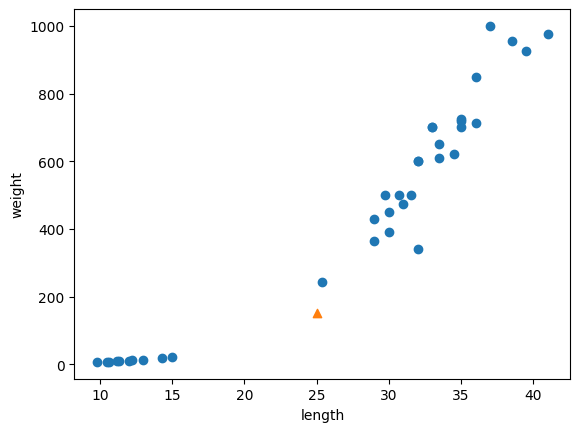

In [28]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')  # marker 매개변수는 모양을 지정합니다.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이 샘플은 분명히 오른쪽 위로 뻗어 있는 다른 도미 데이터에 더 가깝습니다. 그런데 왜 이 모델은 왼쪽 아래에 낮게 깔린 빙어 데이터에 가깝다고 판단한 걸까요?

K-NN은 주변의 샘플 중에서 다수의 클래스를 예측으로 사용합니다.

이 샘플의 주변 샘플을 알아봅시다. KNeighborsClassifier 클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아주는 **kneighbors()** method를 제공합니다. 이 method는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환합니다.

KNeighborsClassifier 클래스의 이웃 개수인 n_neighbors의 기본값은 5이므로 5개의 이웃이 반환됩니다.

In [29]:
distances, indexes = kn.kneighbors([[25, 150]])

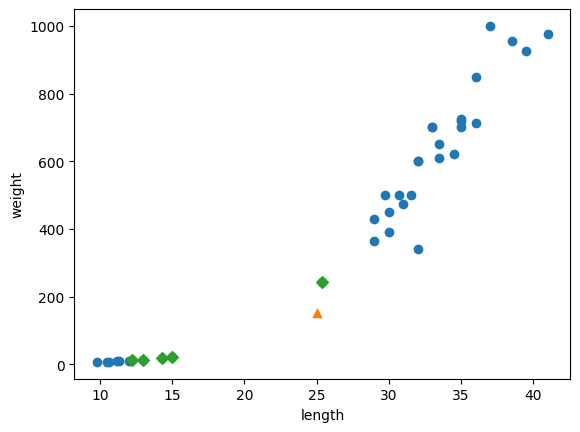

In [30]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')   # marker='D'로 지정하면 산점도를 마름모로 그립니다.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

삼각형 샘플에 가장 가까운 5개의 샘플이 초록 다이아몬드로 표시되었습니다.

예측 결과와 마찬가지로 가장 가까운 이웃에 도미가 하나밖에 포함되지 않습니다. 나머지 4개의 샘플은 모두 빙어입니다.

직접 데이터를 확인해 보겠습니다.

In [31]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


확실히 가장 가까운 생선 4개는 빙어(0)인 것 같습니다. 타깃 데이터로 확인하면 더 명확합니다.

In [32]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


kneighbors() method에서 반환한 distances 배열을 출력해보겠습니다. 이 배열에는 이웃 샘플까지의 거리가 담겨 있습니다.

In [33]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


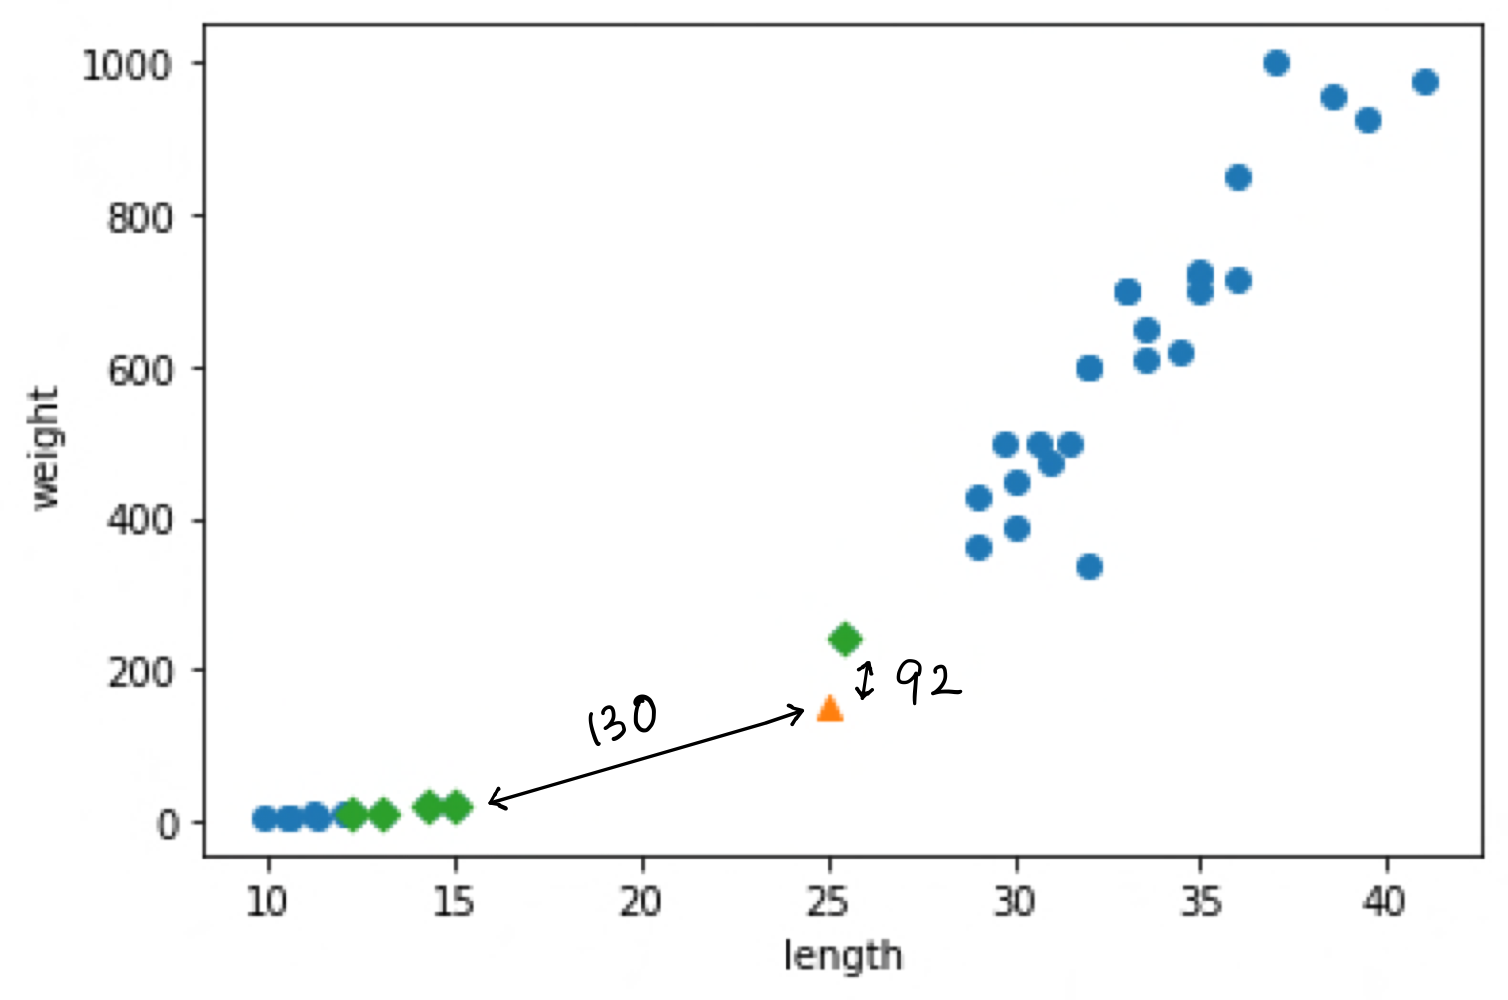

산점도를 다시 살펴 보면, 삼각형 샘플에 가장 가까운 첫 번째 샘플까지의 거리는 92이고, 그외 가장 가까운 샘플들은 모두 130, 138입니다.

그런데 거리가 92와 130이라고 했을 때 그래프에 나타난 거리 비율이 이상하죠?

이는 x축은 범위가 좁고(10 ~ 40), y축은 범위가 넓습니다(0 ~ 1000).
따라서 y축으로 조금만 멀어져도 거리가 아주 큰 값으로 계산됩니다. 이 때문에 오른쪽 위의 도미 샘플이 이웃으로 선택되지 못했던 겁니다.

이를 눈으로 명확히 확인하기 위해 x축의 범위를 동일하게 0~1,000으로 맞추어 보겠습니다.

Matplotlib에서 x축 범위를 지정하려면 **xlim()** 함수를 사용합니다.

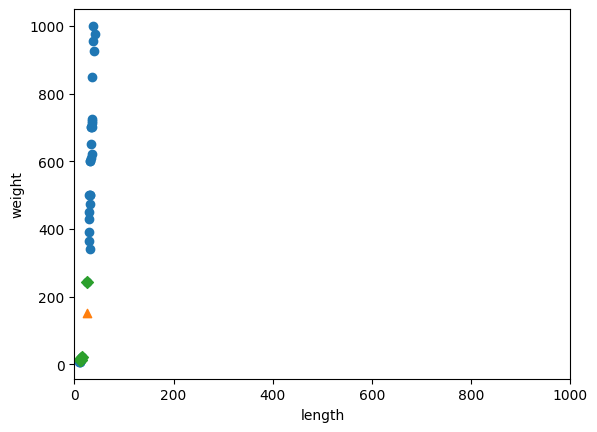

In [34]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

x축과 y축의 범위를 동일하게 맞추었더니 모든 데이터가 수직으로 늘어선 형태가 되었습니다.

이런 데이터라면 생선의 길이(x축)는 가장 가까운 이웃을 찾는 데 크게 영향을 미치지 못하고 오로지 생선의 무게(y축)만 고려 대상이 됩니다.

두 특성(길이와 무게)의 값이 놓인 범위가 매우 다릅니다. 이를 두 특성의 **스케일(scale)**이 다르다고도 말합니다.

## 1.4. Data Preprocessing

데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없습니다. 이런 알고리즘들은 샘플 간의 거리에 영향을 많이 받으므로 제대로 사용하려면 특성값을 일정한 기준으로 맞춰 주어야 합니다. 이런 작업을 **데이터 전처리(data preprocessing)**라고 부릅니다.

가장 널리 사용하는 전처리 방법 중 하나는 **표준점수(standard score)**입니다. 표준점수는 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냅니다. 이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있습니다.

계산하는 방법은 간단합니다. 평균을 빼고 표준편차를 나누어 주면 됩니다. 특성마다 값의 스케일이 다르므로 평균과 표준편차는 각 특성별로 계산해야 합니다. 이를 위해 axis=0으로 지정했습니다. 이렇게 하면 행을 따라 각 열의 통계 값을 계산합니다.

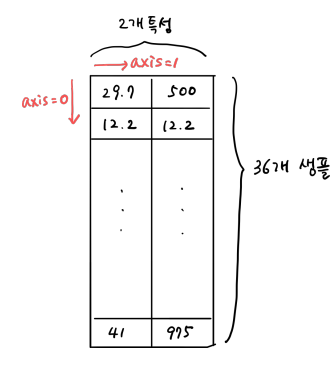

In [35]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [36]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [37]:
train_scaled = (train_input - mean) / std

## 1.5. Train a model with preprocessed data

샘플 [25, 150]을 훈련 세트의 mean, std를 이용해 변환한 후, 산점도를 살펴 봅시다.

In [38]:
new = ([25, 150] - mean) / std

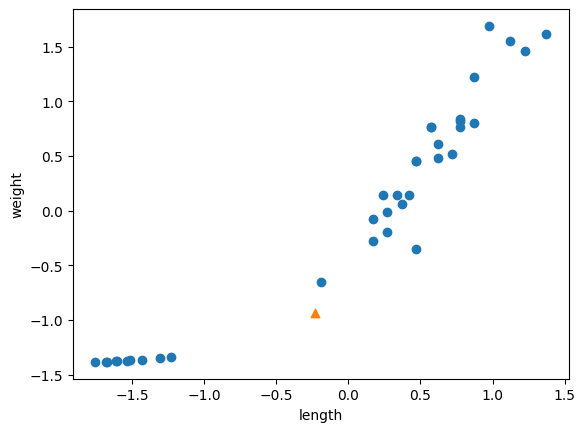

In [39]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이 그래프는 앞서 표준편차로 변환하기 전의 산점도와 거의 동일합니다. 크게 달라진 점은 x축과 y축의 범위가 -1.5 ~ 1.5 사이로 바뀌었다는 것입니다. 훈련 데이터의 두 특성이 비슷한 범위를 차지하고 있습니다.

이제 이 데이터셋으로 K-NN 모델을 다시 훈련해 봅시다.

In [40]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [41]:
test_scaled = (test_input - mean) / std

In [42]:
kn.score(test_scaled, test_target)

1.0

In [43]:
print(kn.predict([new]))

[1.]


이제 샘플 [25, 150]을 도미(1)로 제대로 예측했습니다.

kneighbors() 함수로 이 샘플의 K-NN을 구한 다음 산점도로 그려 보겠습니다.

In [44]:
distances, indexes = kn.kneighbors([new])

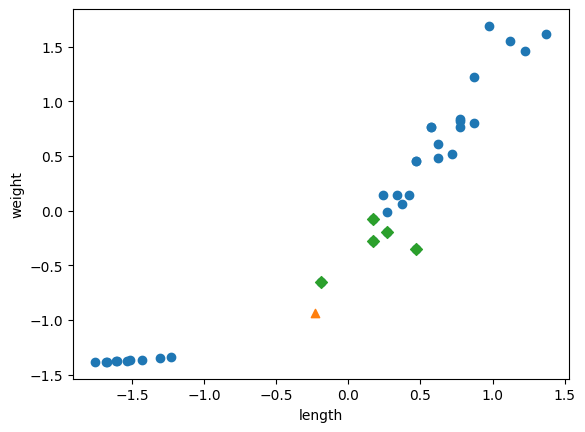

In [45]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

세모 모양의 샘플에서 가장 가까운 샘플은 모두 도미인 것을 볼 수 있습니다. 따라서 이 샘플을 도미로 예측하는 것이 당연합니다.

지금까지 특성값의 스케일에 민감하지 않고 안정적인 예측을 할 수 있는 모델을 만들어 봤습니다.

## 1.6. Overfitting & Underfitting

In [46]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

for n in range(5, 50):
    # 최근접 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산
    score = kn.score(test_input, test_target)
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n, score)
        break

20 0.9230769230769231


In [47]:
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)

for n in range(2, 37):
    # 최근접 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산
    score = kn.score(test_scaled, test_target)
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n, score)
        continue

21 0.6923076923076923
22 0.6923076923076923
23 0.6923076923076923
24 0.6923076923076923
25 0.6923076923076923
26 0.6923076923076923
27 0.6923076923076923
28 0.6923076923076923
29 0.6923076923076923
30 0.6923076923076923
31 0.6923076923076923
32 0.6923076923076923
33 0.6923076923076923
34 0.6923076923076923
35 0.6923076923076923
36 0.6923076923076923


In [48]:
kn = KNeighborsClassifier(n_neighbors=2)
kn.fit(train_scaled, train_target)
score = kn.score(test_scaled, test_target)
print(score)

1.0


In [49]:
kn = KNeighborsClassifier(n_neighbors=30)
kn.fit(train_scaled, train_target)
score = kn.score(test_scaled, test_target)
print(score)

0.6923076923076923


In [ ]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 1.9 MB/s eta 0:00:00


In [ ]:
import mglearn

fig, axis = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([2, 5, 30], axis):
    # the fit method returns the object self, so we can instantiate and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(train_scaled, train_target)
    mglearn.plots.plot_2d_separator(clf, train_scaled, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(train_scaled[:, 0], train_scaled[:, 1], train_target, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature0")
    ax.set_ylabel("feature1")
axis[0].legend(loc=3)
plt.show()

k가 작을 때는 너무 민감하게 반응하며, 평균값과 큰 차이가 있는 데이터(Noise)가 많이 있습니다. (현재 데이터는 갯수가 작아 잘 보이지 않습니다.)

k=30일 때는 너무 둔감하게 반응하고 그룹의 경계에 대한 변별력이 없는 상태입니다.
